# Battle of Neighborhoods

## Scarborough (Ontario), Canada

## Exploring and clustering the neighborhoods

Some Italian people have realized that new job opportunities have opened up in Scarborough (Ontario), having relatives living there. So they decided to move to this location. Before leaving, they would like to know more about this city and its neighborhoods so that they can evaluate where to live.Before leaving, they would like to have more information about this district and its neighborhoods in order to evaluate where to go to live.

Project Description: The project aims to carry out an analysis of the characteristics of the Scarborough neighbourhoods in order to help these families make a considered choice. Characteristics include, for example, housing price ranges, population rate, level of goodness of schools, crime rate, weather conditions, accommodation facilities. Having information in advance about a future place (cities, neighbourhoods) to live in gives these families the opportunity to make the right choice and not to feel bad afterwards.

This Project will give precisely this valuable information to the families who will move to Scarborough.

### 1. Python packages and dependencies¶

In [1]:
#!conda install -c conda-forge geopy --yes        # if needed
#!conda install -c conda-forge folium=0.5.0 --yes # if needed

import json # library to handle JSON files
import xml
import pandas as pd #Python library data manipulation and analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
%matplotlib inline

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


from pandas.io.json import json_normalize # tranform JSON file into a Pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import K-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import warnings
warnings.filterwarnings("ignore")

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.0               |             py_0          26 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                       

### 2. Import Data

In [2]:
toronto_task2_csv = "Toronto.TASK2_df.csv"
toronto_neighborhoods = pd.read_csv(toronto_task2_csv)
toronto_neighborhoods.shape
toronto_neighborhoods.head()
print(toronto_neighborhoods.shape)

(103, 5)


In [3]:
address = 'Toronto'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude_x, longitude_y))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


### 3. Map Toronto Canada

In [4]:
# create map of Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

# add markers to map
for lat, lng, nei in zip(toronto_neighborhoods['Latitude'], toronto_neighborhoods['Longitude'], toronto_neighborhoods['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In this activity I focused on analyzing the neighborhoods of Scarborough.

In [6]:
Scarborough_data = toronto_neighborhoods[toronto_neighborhoods['Borough'].str.contains("Scarborough")].reset_index(drop=True)
print(Scarborough_data.shape)
Scarborough_data.head(20)

(17, 5)


,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


### 3.1 Map Scarborough, Toronto Canada

In [7]:
# I used the same coordinates for the previous view
map_Scarborough = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# I added markers to map
for lat, lng, label in zip(Scarborough_data['Latitude'], Scarborough_data['Longitude'], Scarborough_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Scarborough)  
    
map_Scarborough

### In order to explore and segment neighborhoods, I used the Foursquare API

In [8]:
import getpass
CLIENT_ID = getpass.getpass ('Enter your Foursquare Client ID :') # your Foursquare Client ID
CLIENT_SECRET = getpass.getpass ('Enter your Foursquare Client Secret:') # your Foursquare Client Secret
VERSION = '20180605' # Foursquare API version
#LIMIT = 30

Enter your Foursquare Client ID :········
Enter your Foursquare Client Secret:········


In [9]:
address = 'Scarborough,Toronto'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_N1 = location.latitude
longitude_N1 = location.longitude
print('The geograpical coordinate of neighborhood_N1 are {}, {}.'.format(latitude_x, longitude_y))

The geograpical coordinate of neighborhood_N1 are 43.653963, -79.387207.


In [10]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_N1, 
   longitude_N1, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [11]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.events.count', 'venue.events.summary', 'venue.id',
       'venue.location.address', 'venue.location.cc', 'venue.location.city',
       'venue.location.country', 'venue.location.crossStreet',
       'venue.location.distance', 'venue.location.formattedAddress',
       'venue.location.labeledLatLngs', 'venue.location.lat',
       'venue.location.lng', 'venue.location.neighborhood',
       'venue.location.postalCode', 'venue.location.state', 'venue.name',
       'venue.photos.count', 'venue.photos.groups', 'venue.venuePage.id'],
      dtype='object')

In [13]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### 4. Nearby Venues

In [14]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Disney Store,"[{'id': '4bf58dd8d48988d1f3941735', 'name': 'T...",43.775537,-79.256833
1,SEPHORA,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",43.775017,-79.258109
2,American Eagle Outfitters,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.776012,-79.258334
3,St. Andrews Fish & Chips,"[{'id': '4edd64a0c7ddd24ca188df1a', 'name': 'F...",43.771865,-79.252645
4,Canyon Creek Chophouse,"[{'id': '4bf58dd8d48988d1cc941735', 'name': 'S...",43.776959,-79.261694


### 5. Categories of Nearby Venues

In [15]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Disney Store,Toy / Game Store,43.775537,-79.256833
1,SEPHORA,Cosmetics Shop,43.775017,-79.258109
2,American Eagle Outfitters,Clothing Store,43.776012,-79.258334
3,St. Andrews Fish & Chips,Fish & Chips Shop,43.771865,-79.252645
4,Canyon Creek Chophouse,Steakhouse,43.776959,-79.261694


In [16]:
# Top 10 Categories
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Clothing Store    8
Coffee Shop       5
Cosmetics Shop    3
Restaurant        3
Gas Station       2
Food Court        2
Sandwich Place    2
Tea Room          2
Pharmacy          2
Bakery            1
Name: categories, dtype: int64

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
# Nearby Venues
Scarborough_venues = getNearbyVenues(names=Scarborough_data['Neighborhood'],
                                   latitudes=Scarborough_data['Latitude'],
                                   longitudes=Scarborough_data['Longitude']
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge


In [19]:
print('There are {} uniques categories.'.format(len(Scarborough_venues['Venue Category'].unique())))
Scarborough_venues.groupby('Neighborhood').count().head()

There are 79 uniques categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,8,8,8,8,8,8
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",14,14,14,14,14,14
"Birch Cliff, Cliffside West",7,7,7,7,7,7
Cedarbrae,16,16,16,16,16,16
"Clairlea, Golden Mile, Oakridge",15,15,15,15,15,15


### One Hot Encoding of Features

In [20]:
# one hot encoding
Scarborough_onehot = pd.get_dummies(Scarborough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Scarborough_onehot['Neighborhood'] = Scarborough_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Scarborough_onehot.columns[-1]] + list(Scarborough_onehot.columns[:-1])
Scarborough_onehot = Scarborough_onehot[fixed_columns]
Scarborough_grouped = Scarborough_onehot.groupby('Neighborhood').mean().reset_index()
Scarborough_onehot.head()

,Neighborhood,Athletics & Sports,Badminton Court,Bakery,Bank,Bar,Beer Store,Breakfast Spot,Burger Joint,Bus Line,Bus Station,Business Service,Café,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,College Stadium,Construction & Landscaping,Convenience Store,Cosmetics Shop,Department Store,Diner,Discount Store,Electronics Store,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flower Shop,Fried Chicken Joint,Furniture / Home Store,Gas Station,General Entertainment,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Hardware Store,Hobby Shop,Hookah Bar,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lounge,Malay Restaurant,Medical Center,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Moving Target,Nail Salon,Noodle House,Other Great Outdoors,Park,Pet Store,Pharmacy,Pizza Place,Pool Hall,Rental Car Location,Restaurant,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Spa,Sports Bar,Supermarket,Thai Restaurant,Thrift / Vintage Store,Vietnamese Restaurant,Wine Shop,Wings Joint
0,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [21]:
num_top_venues = 5
for hood in Scarborough_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp =Scarborough_grouped[Scarborough_grouped['Neighborhood'] == hood].T.reset_index()    
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    
    print('\n')

----Agincourt----
                       venue  freq
0                  Pool Hall  0.12
1               Skating Rink  0.12
2  Latin American Restaurant  0.12
3                     Lounge  0.12
4             Sandwich Place  0.12


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                  venue  freq
0  Fast Food Restaurant  0.14
1    Chinese Restaurant  0.14
2          Noodle House  0.14
3           Pizza Place  0.14
4              Pharmacy  0.07


----Birch Cliff, Cliffside West----
                   venue  freq
0                  Diner  0.14
1           Skating Rink  0.14
2                   Park  0.14
3        College Stadium  0.14
4  General Entertainment  0.14


----Cedarbrae----
                venue  freq
0              Bakery  0.12
1         Coffee Shop  0.12
2   Indian Restaurant  0.12
3  Athletics & Sports  0.06
4         Flower Shop  0.06


----Clairlea, Golden Mile, Oakridge----
            venue  freq
0          Bakery  0.13
1    Intersection  0.13

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Most Common venues near neighborhood

In [23]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Scarborough_grouped['Neighborhood']

for ind in np.arange(Scarborough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Scarborough_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Sandwich Place,Badminton Court,Breakfast Spot,Pool Hall,Skating Rink,Latin American Restaurant,Shanghai Restaurant,Lounge,Wings Joint,Discount Store
1,"Agincourt North, L'Amoreaux East, Milliken, St...",Pizza Place,Fast Food Restaurant,Chinese Restaurant,Noodle House,Shop & Service,Caribbean Restaurant,Gym,Park,Pharmacy,Malay Restaurant
2,"Birch Cliff, Cliffside West",Park,Diner,Thai Restaurant,College Stadium,General Entertainment,Skating Rink,Café,Flower Shop,Discount Store,Electronics Store
3,Cedarbrae,Coffee Shop,Indian Restaurant,Bakery,Athletics & Sports,Thai Restaurant,Bank,Hakka Restaurant,Gym / Fitness Center,Flower Shop,Gas Station
4,"Clairlea, Golden Mile, Oakridge",Diner,Bus Line,Bakery,Intersection,Park,Convenience Store,Metro Station,Coffee Shop,Bus Station,Ice Cream Shop


### K-means Clustering

In [24]:
# set number of clusters
# Using k-means to cluster the neighborhood into 3 clusters.
kclusters = 3

Scarborough_grouped_clustering = Scarborough_grouped.drop('Neighborhood', 1)
#Scarborough_grouped_clustering = Scarborough_grouped

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Scarborough_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2], dtype=int32)

In [30]:
Scarborough_merged =Scarborough_data.iloc[:16,:]

# add clustering labels
Scarborough_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Scarborough_merged = Scarborough_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Scarborough_merged.head(20)# check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,0,Fast Food Restaurant,Coffee Shop,Hobby Shop,Construction & Landscaping,Filipino Restaurant,Spa,Furniture / Home Store,Electronics Store,Fish Market,Flower Shop
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,0,Breakfast Spot,Bar,Burger Joint,Wings Joint,Gas Station,Electronics Store,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flower Shop
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0,Park,Fast Food Restaurant,Restaurant,Greek Restaurant,Fried Chicken Joint,Intersection,Electronics Store,Medical Center,Mexican Restaurant,Moving Target
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0,Coffee Shop,Park,Business Service,Convenience Store,Wings Joint,Electronics Store,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flower Shop
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0,Coffee Shop,Indian Restaurant,Bakery,Athletics & Sports,Thai Restaurant,Bank,Hakka Restaurant,Gym / Fitness Center,Flower Shop,Gas Station
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,0,Ice Cream Shop,Pizza Place,Convenience Store,Fast Food Restaurant,Coffee Shop,Fried Chicken Joint,Electronics Store,Filipino Restaurant,Fish Market,Flower Shop
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,0,Coffee Shop,Discount Store,Convenience Store,Department Store,Sandwich Place,Intersection,Grocery Store,Light Rail Station,Metro Station,Hobby Shop
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,0,Diner,Bus Line,Bakery,Intersection,Park,Convenience Store,Metro Station,Coffee Shop,Bus Station,Ice Cream Shop
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476,0,Wings Joint,Hardware Store,Gym / Fitness Center,Burger Joint,Chinese Restaurant,Fried Chicken Joint,Electronics Store,Fast Food Restaurant,Filipino Restaurant,Fish Market
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,0,Park,Diner,Thai Restaurant,College Stadium,General Entertainment,Skating Rink,Café,Flower Shop,Discount Store,Electronics Store


In [31]:
# create map
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, nei , cluster in zip(Scarborough_merged['Latitude'], 
                                   Scarborough_merged['Longitude'], 
                                   Scarborough_merged['Neighborhood'], 
                                   Scarborough_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

['#8000ff', '#80ffb4', '#ff0000']


In [32]:
df1=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 0,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]

df2=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 1,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]
df3=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 2,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]

### Average Housing Prices

In [33]:
Scarborough_Avg_HousingPrice=pd.DataFrame({"Neighborhood":Scarborough_data["Neighborhood"],
                                      "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0,433500.0]})

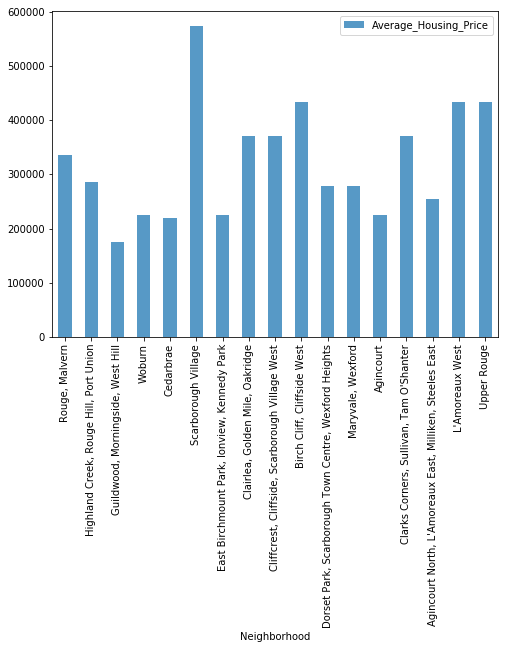

In [34]:
Scarborough_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)
Scarborough_Avg_HousingPrice.plot(kind='bar',figsize=(8,6),alpha=0.75)

### School Rating by Clusters

In [35]:
clusters=pd.DataFrame({"Cluster1":df1["Neighborhood"],
                      "Cluster2":df2["Neighborhood"],
                      "Cluster4":df3["Neighborhood"]})
clusters = clusters.replace(np.nan, '', regex=True)

In [98]:
new_Scarborough=Scarborough_merged.set_index("Neighborhood",drop=True)
#Source:https://www.greatschools.org
Scarborough_school_ratings=pd.DataFrame({"Neighborhood":Scarborough_data["Neighborhood"],
                                      "Top School Rating":[7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2,6,]})

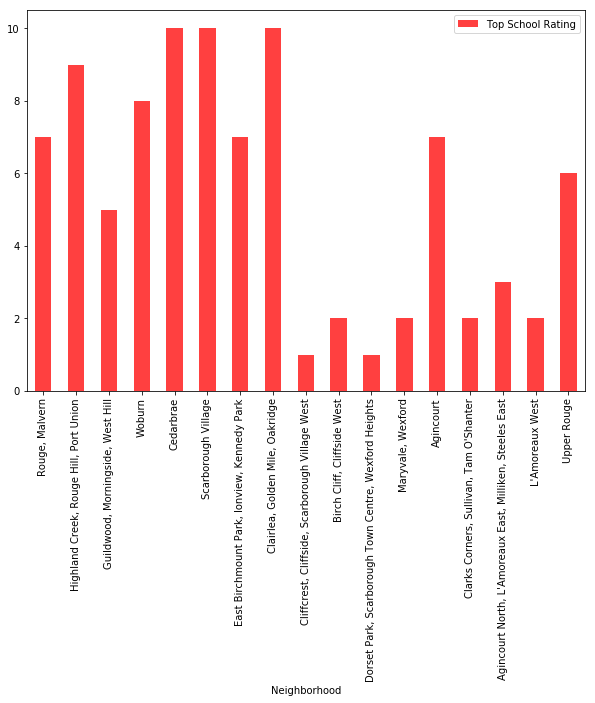

In [99]:
Scarborough_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

Scarborough_school_ratings.plot(kind='bar',figsize=(10,7),color='red',alpha=0.75);

### Conclusion:
Thanks to the k-means cluster algorithm we divide the neighbourhood into 03 clusters, which have similar neighbourhoods around them. Using the above graphs you can decide to focus on a particular neighborhood based on average house prices and school ratings.